In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")
col = train.columns

In [3]:
#Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
f=128903 #bullet styling
col # Colum names
for i, n in enumerate(col):
    print("{:c} index: {}  column name: {}".format(f,i,n))

🞇 index: 0  column name: PassengerId
🞇 index: 1  column name: Survived
🞇 index: 2  column name: Pclass
🞇 index: 3  column name: Name
🞇 index: 4  column name: Sex
🞇 index: 5  column name: Age
🞇 index: 6  column name: SibSp
🞇 index: 7  column name: Parch
🞇 index: 8  column name: Ticket
🞇 index: 9  column name: Fare
🞇 index: 10  column name: Cabin
🞇 index: 11  column name: Embarked


## Preprocessing:

In [5]:
def toDoPrint(List,f):
    str =""
    temp = ""
    for i in List:
        temp ="{:c} {}".format(f,i)
        print(temp)
        str += temp + "\n"
    return str
        
        
        
Todo = {"Missing data: Age, Cabin, Embarked",
        "Handling Data","Convert string values to numeric", 
        "Remove cols that do not contribute: Name, Cabin, Ticket and ?"
    }

todo_list = toDoPrint(Todo,f)

🞇 Convert string values to numeric
🞇 Handling Data
🞇 Remove cols that do not contribute: Name, Cabin, Ticket and ?
🞇 Missing data: Age, Cabin, Embarked


## Missing data:

In [6]:
def numerOfMissingValues(p, col, get_data = False):
    """numerOfMissingValues(pd, col, get_data = False)
       p: DataFrame
       col: column that needs to find the missing values

       Returns the total number of missing data
       return the pandas DatFrame of values if get_data is set to True
    """
    data = p[pd.isnull(p[col])]
    if get_data:
        return data
    else: 
        return len(data)

In [7]:
# As shown on info there are 891 rows of data

missing =['Age', 'Cabin','Embarked']
for i in missing:
    print("{:c} Number of values missing in {} is: {}".format(f,i,numerOfMissingValues(train,i)))
    

🞇 Number of values missing in Age is: 177
🞇 Number of values missing in Cabin is: 687
🞇 Number of values missing in Embarked is: 2


***As shown above there are 177 missing values in Age, Cabin and Embarked**

### Handling Missing Data

In [ ]:
#Age: interpolate the missing data
train['Age'] = train['Age'].interpolate()
#Drop 'Name','Ticket','Cabin' because it is nor relavant to the model
cols = ['Name','Ticket','Cabin']
train = train.drop(cols,axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
print(todo_list)

🞇 Convert string values to numeric
🞇 Handling Data
🞇 Remove cols that do not contribute: Name, Cabin, Ticket and ?
🞇 Missing data: Age, Cabin, Embarked



In [11]:
GenderVsSurvived = train[['Survived','Sex']]
GenderVsSurvived.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [12]:
def sexRatio(data):
    """m = male 
       f = female
       t = Total
       return an array [men%, female%, Total]
    """
    m=data.Sex[train.Sex=="male"].count()
    f=data.Sex[train.Sex=="female"].count()
    t=m+f
    return [m/t*100,f/t*100,t]

In [13]:
def sumList(a,b):
    """return corresponding sum of each elements"""
    length = len(a)
    if(length != len(b)):
        print("A and B are not the same length")
        return []
    
    sum_v =[]
    for i in range(0,length):
        sum_v.append(a[i]+b[i])
        
    return sum_v
    
    
def pieChart(data, data1=[], both=False):
  
    
    if(both):
        ratio = sumList(sexRatio(data),sexRatio(data1))
    else:
        ratio = sexRatio(data)
    
    labels = 'Male', 'Female'
    sizes = [ratio[0], ratio[1]]
    

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    

    plt.show()
    
    

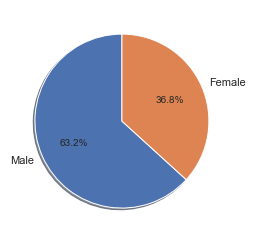

In [14]:
pieChart(train,test,both=True)

In [15]:
class_p=(train.Pclass[train.Pclass==1].count(),
train.Pclass[train.Pclass==2].count(),
train.Pclass[train.Pclass==2].count())

In [16]:
class_p

(216, 184, 184)

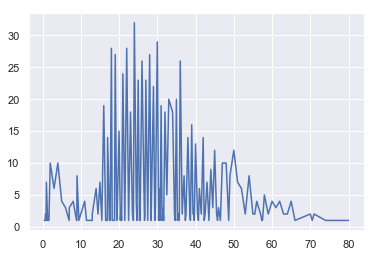

In [17]:
age_counts = train.Age.value_counts()
age_counts.sort_index().plot()

In [18]:
age_counts

24.000000    32
30.000000    29
22.000000    28
18.000000    28
19.000000    27
28.000000    27
36.000000    26
26.000000    26
21.000000    24
27.000000    23
25.000000    23
29.000000    22
33.000000    20
35.000000    20
16.000000    19
31.000000    19
34.000000    18
23.000000    18
32.000000    18
39.000000    16
20.000000    15
42.000000    14
17.000000    14
38.000000    14
40.000000    13
50.000000    12
45.000000    12
48.000000    10
4.000000     10
47.000000    10
             ..
21.500000     1
11.500000     1
12.500000     1
15.500000     1
25.500000     1
57.500000     1
9.500000      1
43.500000     1
80.000000     1
1.375000      1
46.500000     1
17.500000     1
22.500000     1
1.666667      1
38.666667     1
70.500000     1
16.943333     1
0.670000      1
37.333333     1
18.600000     1
18.400000     1
31.666667     1
11.915000     1
27.500000     1
12.000000     1
8.886667      1
39.666667     1
0.920000      1
34.666667     1
48.666667     1
Name: Age, Length: 155, 